In [1]:
!pip install sastrawi -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [63]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import requests

In [71]:
# load dataset into pandas
data = pd.read_excel('DataSentiment.xlsx')
data.head()

,text,sentimen
0,Kelak setelah jadi pasti yg dulunya di pinggir...,positive
1,Palingan kebanyakan org China yg tinggal 😂,negative
2,Ada yg aneh gak?? Knapa harus kalimantan?? Ko...,negative
3,Goodbye ekosistem alam 😢,negative
4,kawasan yg masih sanggat terpencil....kasian k...,negative


Exploratory Data Analysis (EDA)

In [72]:
# check missing value
data.isnull().sum()

text        0
sentimen    0
dtype: int64

In [73]:
# check the number of positive and negative tweets
data['sentimen'].value_counts()

positive    611
negative    400
Name: sentimen, dtype: int64

In [74]:
data.dtypes

text        object
sentimen    object
dtype: object

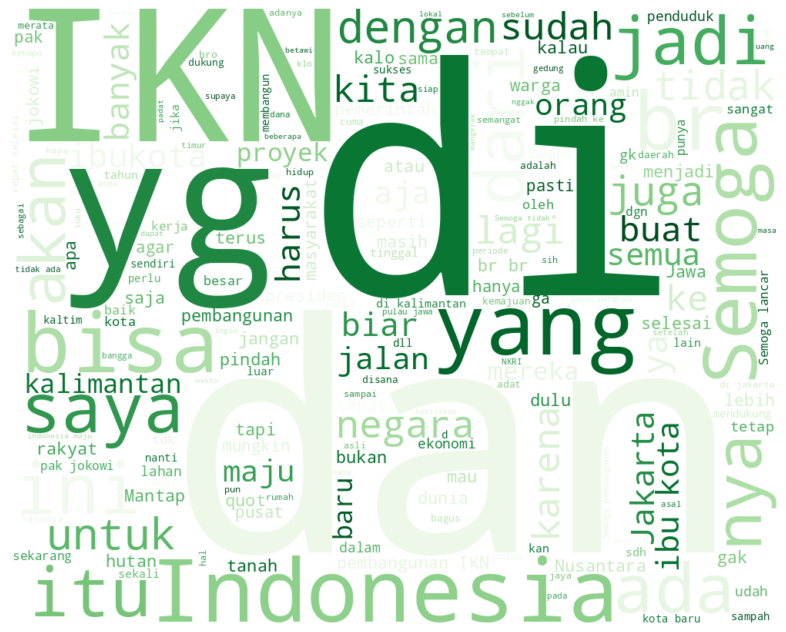

In [77]:
# wordcloud tweet sentiment positive
data_pos = data[data['sentimen'] == 'positive']

all_text = ' '.join(word for word in data_pos['text'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

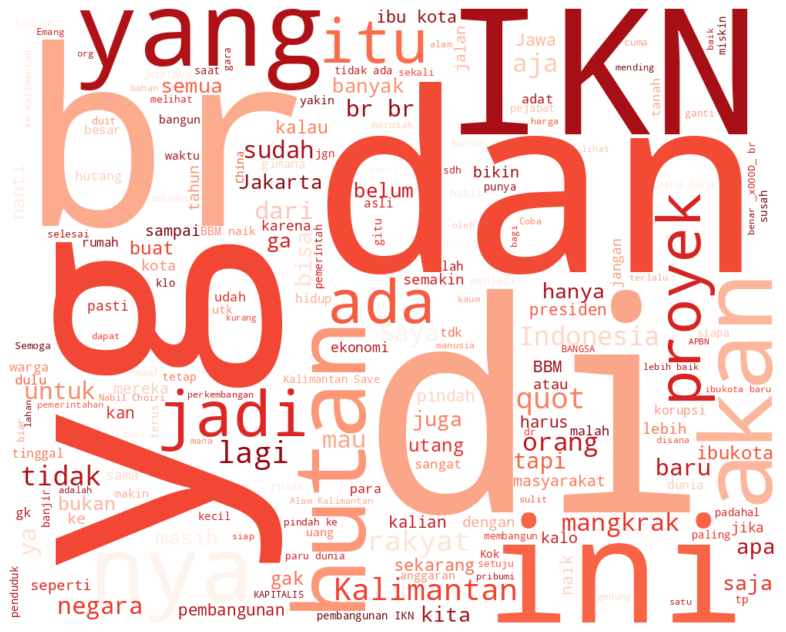

In [78]:
# wordcloud tweet sentiment negative
data_neg = data[data['sentimen'] == 'negative']

all_text = ' '.join(word for word in data_neg['text'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()



*   Pada wordcloud dokumen bersentimen positive muncul kata-kata sentimen positive seperti kemajuan, semoga lancar, dan mantap.
*   Pada wordcloud dokumen bersentimen negative muncul kata-kata sentimen negative seperti korupsi, utang, dan susah.
*   Terdapat stopwords pada dokumen bersentimen positive dan negative seperti kata-kata yang, ini, juga, dan aja yang perlu dihapus pada tahap preprocessing.







Preprocessing

Tahap ini melakukan langkah-langkah berikut:

1. Cleaning text
2. Lowercase
3. Remove stopwords
4. Stemming / lemmatization
5. *Tokenization*

In [79]:
import re

# cleaning text
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text =  url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, " ")

    # remove extra whitespace
    text = text.strip()

    # lowercase
    text = text.lower()
    return text

In [80]:
import nltk
import requests
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# CONSTRUCT STOPWORDS
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
nltk_stopword = stopwords.words('indonesian')

# create path url for each stopword
path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword,
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# combine stopwords
stopwords_l = nltk_stopword
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

custom_st = '''
yg yang dgn ane smpai bgt gua gwa si tu ama utk udh btw
ntar lol ttg emg aj aja tll sy sih kalo nya trsa mnrt nih
ma dr ajaa tp akan bs bikin kta pas pdahl bnyak guys abis tnx
bang banget nang mas amat bangettt tjoy hemm haha sllu hrs lanjut
bgtu sbnrnya trjadi bgtu pdhl sm plg skrg
'''

# create dictionary with unique stopword
st_words = set(stopwords_l)
custom_stopword = set(custom_st.split())

# result stopwords
stop_words = st_words | custom_stopword
print(f'Stopwords: {list(stop_words)[:5]}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stopwords: ['menyampaikan', 'setibanya', 'secukupnya', 'dilakukan', 'sekadarnya']


In [81]:
# remove stopwords
from nltk import word_tokenize, sent_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [82]:
# stemming and lemmatization
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [83]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

In [84]:
# example
text = 'Menurut saya, pemindahan ibukota ke IKN... nantinya akan memberikan pengaruh positif bagi masyarakat indonesia.. :)'
print(f'Original text: \n{text}\n')

# cleaning text and lowercase
text = cleaning_text(text)
print(f'Cleaned text: \n{text}\n')

# remove stopwords
text = remove_stopword(text)
print(f'Removed stopword: \n{text}\n')

# stemming and lemmatization
text = stemming_and_lemmatization(text)
print(f'Stemmed and lemmatized: \n{text}\n')

# tokenization
text = tokenize(text)
print(f'Tokenized: \n{text}')

Original text: 
Menurut saya, pemindahan ibukota ke IKN... nantinya akan memberikan pengaruh positif bagi masyarakat indonesia.. :)

Cleaned text: 
menurut saya  pemindahan ibukota ke ikn    nantinya akan memberikan pengaruh positif bagi masyarakat indonesia

Removed stopword: 
pemindahan ibukota ikn pengaruh positif masyarakat indonesia

Stemmed and lemmatized: 
pindah ibukota ikn pengaruh positif masyarakat indonesia

Tokenized: 
['pindah', 'ibukota', 'ikn', 'pengaruh', 'positif', 'masyarakat', 'indonesia']


In [85]:
# pipeline preprocess
def preprocess(text):
    # cleaning text and lowercase
    output = cleaning_text(text)

    # remove stopwords
    output = remove_stopword(output)

    # stemming and lemmatization
    output = stemming_and_lemmatization(output)

    # tokenization
    output = tokenize(output)

    return output

In [86]:
# test pipeline preprocess
text = 'Menurut saya, pemindahan ibukota ke IKN... nantinya akan memberikan pengaruh positif bagi masyarakat indonesia.. :)'
preprocess(text)

['pindah', 'ibukota', 'ikn', 'pengaruh', 'positif', 'masyarakat', 'indonesia']

In [87]:
# implement preprocessing
preprocessed_data = data.copy()
preprocessed_data['text'] = data['text'].map(preprocess)

In [88]:
preprocessed_data.head()

,text,sentimen
0,"[kelak, pinggir, pohon, ubah, gedung2, masyara...",positive
1,"[paling, banyak, org, china]",negative
2,"[aneh, gak, knapa, kalimantan, kayak, mafia, h...",negative
3,"[goodbye, ekosistem, alam]",negative
4,"[kawasan, sanggat, pencil, kasi, kao, jkwei]",negative


In [89]:
preprocessed_data['text'][10]

['saran', 'nm', 'ibukota', 'undang', 'quot', 'hukum', 'ikan', 'ikni']

Data sudah dilakukan preprocessing untuk keseluruhan.

Tahap berikutnya melakukan split dataset menjadi data train dan data test.

SPLIT DATASET

In [90]:
from sklearn.model_selection import train_test_split

X = preprocessed_data['text']
y = preprocessed_data['sentimen']

X.head()

0    [kelak, pinggir, pohon, ubah, gedung2, masyara...
1                         [paling, banyak, org, china]
2    [aneh, gak, knapa, kalimantan, kayak, mafia, h...
3                           [goodbye, ekosistem, alam]
4         [kawasan, sanggat, pencil, kasi, kao, jkwei]
Name: text, dtype: object

In [91]:
# mapping, negative = 0, positive = 1
y = y.map({'negative':0, 'positive':1})
y.head()

0    1
1    0
2    0
3    0
4    0
Name: sentimen, dtype: int64

In [92]:
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=2021)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((909,), (909,), (102,), (102,))

In [93]:
train_x.head()

49                                             [laksana]
313    [pikirin, rakyat, susah, kerja, dg, skala, pri...
59     [saran, klok, proyek, kebut, siang, malam, kas...
809                                         [big, dream]
370    [ngentek2, i, anggar, mengko, dadi, proyek, ma...
Name: text, dtype: object

FEATURE EXTRACTION

BUILD FREQUENCY DICTIONARY

In [94]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [95]:
# create vocabulary / dictionary frequencies
freqs = build_freqs(train_x.tolist(), train_y.tolist())

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 3404


In [99]:
# check frequency
print(f"Freq dari 'gagal' untuk sentiment 'positive': {freqs[('gagal', 1)]}")
print(f"Freq dari 'gagal' untuk sentiment 'negative': {freqs[('gagal', 0)]}")

Freq dari 'gagal' untuk sentiment 'positive': 4
Freq dari 'gagal' untuk sentiment 'negative': 7


EXTRACT FEATURES

In [100]:
def extract_features(tweet, freqs):
    '''
    Input:
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output:
        x: a feature vector of dimension (1,3)
    '''

    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    #bias term is set to 1
    x[0,0] = 1

    # loop through each word in the list of words
    for word in tweet:

        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.),0)

        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.),0)

    assert(x.shape == (1, 3))
    return x

In [101]:
# test extract features function
tmp = extract_features(train_x.to_numpy()[10], freqs)

print(f'text: {train_x.to_numpy()[10]}')
print(f'feature extraction result: {tmp}')

text: ['tolak', 'kota', 'pindah']
feature extraction result: [[  1. 121.  60.]]


In [102]:
# test 2
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('wkwkwk wkwkkwkwkwkwkwk xaxaxaxa', freqs)
print(tmp2)

[[ 1. 21. 32.]]


In [103]:
# extract all of the features

# collect the features 'x' and stack them into a matrix 'X'
X_train = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X_train[i, :]= extract_features(train_x.to_numpy()[i], freqs)

X_train[:5]

array([[  1.,   4.,   0.],
       [  1.,  59.,  54.],
       [  1., 941., 495.],
       [  1.,   2.,   0.],
       [  1.,  56.,  84.]])

LOGISTIC REGRESSION

In [104]:
# create sigmoid function
def sigmoid(z):
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))

    return h

In [105]:
# test sigmoid function
sigmoid(-1.4721)

0.18662363413574892

In [106]:
# create gradient descent function

def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    # get 'm', the number of rows in matrix x
    m = x.shape[0]

    for i in range(0, num_iters):

        # get z, the dot product of x and theta
        z = np.dot(x,theta)

        # get the sigmoid of z
        h = sigmoid(z)

        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))

        # update the weights theta
        theta = theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))

    J = float(J)
    return J, theta

In [107]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


TRAINING

In [108]:
# training labels corresponding to X
Y_train = np.expand_dims(train_y.to_numpy(), axis=1)

# Apply gradient descent
init_theta = np.zeros((3, 1))
init_alpha = 1e-4
iter = 3000

J, theta = gradientDescent(X_train, Y_train, init_theta, init_alpha, iter)

print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.52562808.
The resulting vector of weights is [0.00193589, 0.01773006, -0.02656489]


<ipython-input-106-7d7f08696455>:28: RuntimeWarning: divide by zero encountered in log
  J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))


TESTING

In [109]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input:
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output:
        y_pred: the probability of a tweet being positive or negative
    '''

    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    print(x)

    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))

    return y_pred

In [110]:
for tweet in test_x:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

[[1. 8. 7.]]
['dana', 'jebol', 'yaaa'] -> 0.489457
[[  1. 188.  54.]]
['ibukota', 'ditengah2', 'wilayah', 'indonesia', 'mantap', 'kmn2', 'deket'] -> 0.869969
[[  1. 165.  37.]]
['dki', 'jakarta', 'bebas', 'steril', 'sakit', 'wabah', 'dki', 'pusat', 'perintah', 'ri', 'pusat', 'lumpuh', 'gawat', 'bahaya'] -> 0.874845
[[  1. 299. 262.]]
['jaya', 'darimana', 'br', 'br', 'utang', 'nambah', 'anak', 'cucu', 'tanggung'] -> 0.160195
[[ 1. 14.  2.]]
['mantap', 'bwang', 'dwit'] -> 0.549098
[[  1. 515. 311.]]
['kosong', 'ikn', 'batal', 'agustus', '2022', 'jabat', 'joko', 'widodo', '2', 'selesai', 'proyek', 'rawan', 'henti', 'sendat', 'presiden', 'pilih', '2024', 'respek', 'proyek', 'ikn', 'minim', 'anggar'] -> 0.705003
[[  1. 138.  31.]]
['mantap', 'indonesia'] -> 0.835507
[[  1. 736. 500.]]
['pindah', 'ibukota', '2024', 'nagacoooo', 'br', 'bangun', 'ruas', 'jalur', 'ka', 'cepat', 'dai', 'jakarta', 'bandung', 'molor', '3', 'br', 'kondisi', 'fungsi', 'itu', 'su8dah', 'makan', 'dana', 'apbn', 'br', 

In [111]:
# predict single text
text1 = 'bagus bagus'
text2 = 'jelek jelek'
text3 = 'bagus jelek'

print( '%s -> %f' % (text1, predict_tweet(preprocess(text1), freqs, theta)))
print( '%s -> %f' % (text2, predict_tweet(preprocess(text2), freqs, theta)))
print( '%s -> %f' % (text3, predict_tweet(preprocess(text3), freqs, theta)))

[[ 1. 30.  8.]]
bagus bagus -> 0.579646
[[1. 0. 0.]]
jelek jelek -> 0.500484
[[ 1. 15.  4.]]
bagus jelek -> 0.540319


ACCURACY TEST

In [112]:
y_hat = []

for tweet in test_x:
    # get the label prediction for the tweet
    y_pred = predict_tweet(tweet, freqs, theta)

    if y_pred > 0.5:
        # append 1.0 to the list
        y_hat.append(1)
    else:
        # append 0 to the list
        y_hat.append(0)

[[1. 8. 7.]]
[[  1. 188.  54.]]
[[  1. 165.  37.]]
[[  1. 299. 262.]]
[[ 1. 14.  2.]]
[[  1. 515. 311.]]
[[  1. 138.  31.]]
[[  1. 736. 500.]]
[[  1. 211.  38.]]
[[  1. 882. 688.]]
[[ 1. 95. 88.]]
[[  1. 233.  68.]]
[[  1. 162. 147.]]
[[  1. 405. 226.]]
[[1. 0. 1.]]
[[1. 3. 0.]]
[[  1. 321. 117.]]
[[ 1. 78. 32.]]
[[  1. 558. 237.]]
[[ 1. 78. 94.]]
[[1. 0. 0.]]
[[ 1. 56. 12.]]
[[  1. 180.  31.]]
[[ 1. 26. 14.]]
[[  1. 127.  34.]]
[[  1. 322. 229.]]
[[  1. 246. 157.]]
[[ 1. 28. 36.]]
[[1.000e+00 1.062e+03 4.530e+02]]
[[  1. 141. 126.]]
[[  1. 241.  41.]]
[[ 1. 32. 14.]]
[[1.000e+00 1.123e+03 6.400e+02]]
[[  1. 137.  60.]]
[[ 1. 42. 11.]]
[[  1. 328. 216.]]
[[1.000e+00 1.139e+03 6.960e+02]]
[[ 1. 72. 14.]]
[[1. 1. 0.]]
[[ 1. 18. 11.]]
[[  1. 283. 203.]]
[[1. 0. 1.]]
[[ 1. 66. 21.]]
[[ 1. 43. 10.]]
[[  1. 117.  18.]]
[[  1. 418. 182.]]
[[  1. 378. 198.]]
[[ 1. 23. 32.]]
[[ 1. 12.  5.]]
[[  1. 613. 407.]]
[[ 1. 32. 32.]]
[[  1. 312.  96.]]
[[  1. 217. 103.]]
[[  1. 192. 119.]]
[[  1. 276. 1

In [113]:
# calculate accuracy
accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)

print(f"Logistic regression model's accuracy = {accuracy:.4f}")

Logistic regression model's accuracy = 0.7157


In [114]:
data.to_csv('DataSentimen_Clean.csv',sep='\t')